# Reproduce R. H. Blackmore et al, Phys. Chem. Chem. Phys., 2020,22, 18774-18787 

This notebook demonstrates reproducing the XAS results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 

R. H. Blackmore, M. E. Rivas, G. F. Tierney, K. M. H. .Mohammed, D. Decarolis, S. Hayama, F. Venturini, G. Held, R. Arrigo, M. Amboage, P. Hellier, E. W. Lynch, M. Amri, M. Casavola, T. Eralp Erden, P. Collier, P. P. Wells (2020) **The electronic structure, surface properties, and in situ N2O decomposition of mechanochemically synthesised LaMnO3** DOI: [10.1039/d0cp00793e](http://doi.org/10.1039/d0cp00793e).

- **Corresponding authors**: P. P. Wells
- **E-mails**: 

The data used for reproducing the results was published in the University of Southampton Institutional Repository doi:[10.5258/SOTON/D1342](http://dx.doi.org/10.5258/SOTON/D1342)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing XAS analysis

The XAS results of the paper are in Figures: [1](https://pubs.rsc.org/image/article/2020/cp/d0cp00793e/d0cp00793e-f1_hi-res.gif), [4](https://pubs.rsc.org/image/article/2020/cp/d0cp00793e/d0cp00793e-f4_hi-res.gif), [6](https://pubs.rsc.org/image/article/2020/cp/d0cp00793e/d0cp00793e-f6_hi-res.gif), and [7](https://pubs.rsc.org/image/article/2020/cp/d0cp00793e/d0cp00793e-f7_hi-res.gif). Additionally, the article indicates which paths to use for fitting in the text.
The captions and metadata for each figure can also be used to map the data to the results presented.

#### Figure Captions
>Fig. 1 (A) XAS Mn K-edge XANES compared to (B) HERFD-XANES of time-slices during the mechanochemial synthesis if LaMnO3 compared to (C) reference Mn(ii), (iii), (iv) oxides and sol–gel synthesised LaMnO3 with (D–F) their respective highlighted pre-edge region. 
>
>Fig. 4 In situ high pressure EDE spectra at 0 GPa and 20 GPa on La2O3 and Mn2O3 mixture after high energy ball milling for 30 min. 
>
>Fig. 6 Mn K-edge EXAFS data after 4 h of milling in (A) atmospheric and (B) inert milling conditions showing the magnitude and imaginary components of the k2-weighted FT data and fits compared to (C) sol–gel synthesised LaMnO3. 
>
>Fig. 7 (A) Mn K-edge XANES with (B) highlighted pre-edge region compared to (C) HERFD-XANES with (D) highlighted pre-edge region of mechanochemial synthesis if LaMnO3 within air and argon environments compared to sol–gel LaMnO3 and precursor Mn2O3. 

#### Metadata (ReadMeFile_PCCP_data_002_.txt)
> This dataset contains: Data supporting figures in the main text and ESI.
The figures are as follows:
> - Figure 2, S1 and S2:(A) Mn Kß XES mainlines for Mn reference oxides and sol-gel synthesised LaMnO3 with (B) ‘time-slices’ during the mechanochemical synthesis of LaMnO3 (C) presents the Kß1,3 max as a function of oxidation state, with a line of best fit calculated from the reference materials and used to calculate the oxidation state of the ball milled materials
These files are in seperate .dat file formats
Figure 4:In situ high pressure EDE to mimic the pressures occuring during ball milling at pressures 0 GPa and 20 GPa
File is in a .prj to be opened in Athena software package
Files are in .dat format to be opened in appropriate XRD software, such as DIFFRAC.SUITE TOPAS or EVA
Figure 6, 7A-B: XAS data for air and argon milled LaMnO3 compared to the sol-gel synthesised perovskite (EXAFS and XANES)
File is in a .prj to be opened in Athena and Artemis software package


In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, 
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

# custom plotting functions
import paper03_plots as c_plot3 # paper 3 has some similar plots

# custom plotting functions
import paper05_plots as c_plot 

In [2]:
data_path = Path("C:/harwell/PSDI_test/wf_data/pub_723/DS0747")

for a_file in data_path.glob('*prj'):
    print("#"*80)
    print(a_file)
    data_prj = athenamgr.read_project(a_file)
    for a_group_name in data_prj._athena_groups.keys():
        print(a_group_name)

################################################################################
C:\harwell\PSDI_test\wf_data\pub_723\DS0747\Figure_1_XANES_time_series.prj
 do not know what to do with key 'LCF' at ''
Mn2O3
Mn_Time_0h
Mn_Time_1h
Mn_Time_2h
Mn_Time_3h
Mn_Sol_gel
Mn_Time_4h
################################################################################
C:\harwell\PSDI_test\wf_data\pub_723\DS0747\Figure_4_in_situ_high_pressure_EDE.prj
pinitial
p20
################################################################################
C:\harwell\PSDI_test\wf_data\pub_723\DS0747\Figure_6_7A_B_XAFS.prj
Mn2O3
Mn_Sol_gel
Mn_air_milled
Mn_argon_milled


### Figure 1 XANES spectra of Pd/Al2O3


 do not know what to do with key 'LCF' at ''


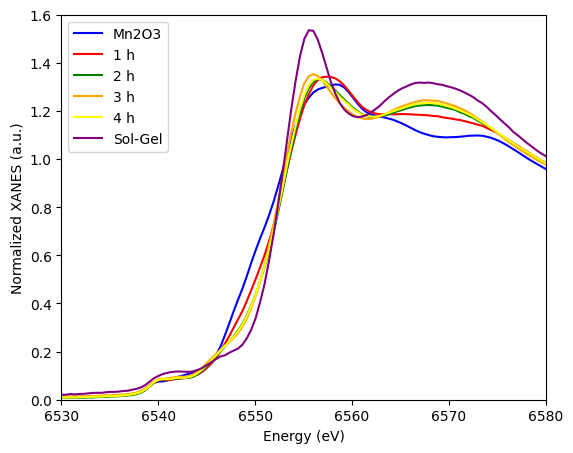

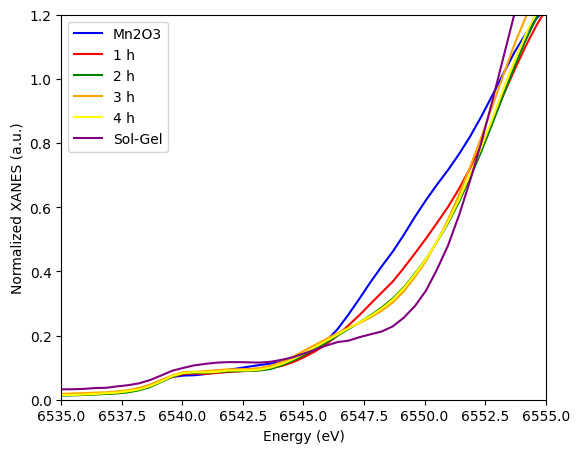

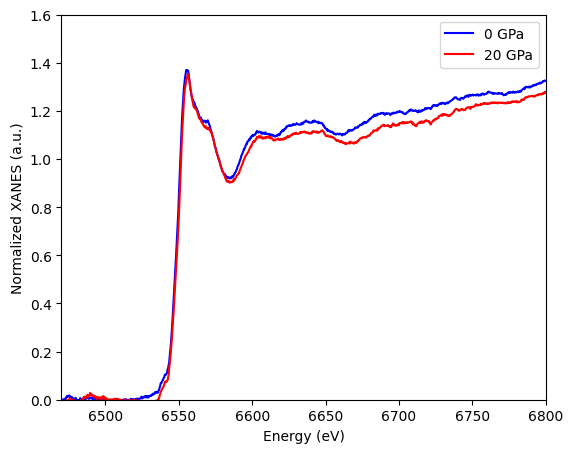

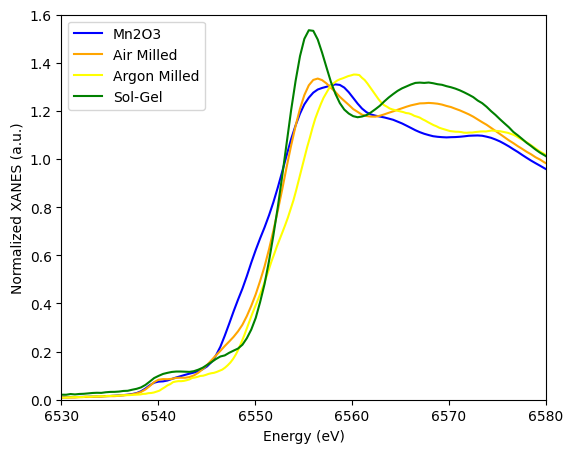

In [3]:
data_path = Path("C:/harwell/PSDI_test/wf_data/pub_723/DS0747")
                 
f1_data = {"project_file": "Figure_1_XANES_time_series.prj",
                 "mappings":{"Mn2O3": "Mn2O3",
                             "0 h":"Mn_Time_0h",
                             "1 h":"Mn_Time_1h",
                             "2 h":"Mn_Time_2h",
                             "3 h":"Mn_Time_3h",
                             "Sol-Gel":"Mn_Sol_gel",
                             "4 h":"Mn_Time_4h"}}

f4_data = {"project_file": "Figure_4_in_situ_high_pressure_EDE.prj",
                 "mappings":{"0 GPa": "pinitial",
                             "20 GPa": "p20",}}

f6_data = {"project_file": "Figure_6_7A_B_XAFS.prj",
                 "mappings":{"Mn2O3": "Mn2O3",
                             "Sol-Gel": "Mn_Sol_gel",
                             "Air Milled": "Mn_air_milled",
                             "Argon Milled": "Mn_argon_milled",}}
                 
data_file = Path(data_path, f1_data['project_file'])
f1_groups = c_plot.get_groups(data_file,f1_data["mappings"])
                 
data_file = Path(data_path, f4_data['project_file'])
f4_groups = c_plot.get_groups(data_file,f4_data["mappings"])                 


data_file = Path(data_path, f6_data['project_file'])
f6_groups = c_plot.get_groups(data_file,f6_data["mappings"])     

#define dict to set colours and line stiles
f1_plot_groups = {"Mn2O3":["blue", "solid"],
                  "1 h":['red', "solid"],
                  "2 h":["green", "solid"], 
                  "3 h":["orange", "solid"], 
                  "4 h":["yellow", "solid"], 
                  "Sol-Gel":["purple", "solid"], 
                 }

#xanes_01_groups["PdO"] = athenamgr.recalibrate_energy(xanes_01_groups["PdO"], xanes_01_groups["Reduced Sample"].e0)

plt = c_plot3.plot_normalised(f1_groups, f1_plot_groups,(6.25,5),[6530, 6580],[0,1.6])
plt.show()

plt = c_plot3.plot_normalised(f1_groups, f1_plot_groups,(6.25,5),[6535, 6555],[0,1.2])
plt.show()

# deviation from metadata:
#  - recalibration to e0
#  - using Pos_0_5_100C_After_Reduction from 100C.prj instead of merge
#    of signals from He_after_reduction.prj (equivalent result tested
#    in atehena)

#define dict to set colours and line stiles
f4_plot_groups = {"0 GPa":["blue", "solid"],
                  "20 GPa":['red', "solid"],}

plt = c_plot3.plot_normalised(f4_groups, f4_plot_groups,(6.25,5),[6470, 6800],[0,1.6])
plt.show()

f6_plot_groups={"Mn2O3": ["blue", "solid"],
                "Air Milled": ["orange", "solid"],
                "Argon Milled": ["yellow", "solid"],
                "Sol-Gel": ["green", "solid"],}

plt = c_plot3.plot_normalised(f6_groups, f6_plot_groups,(6.25,5),[6530, 6580],[0,1.6])
plt.show()

### Figure 2c Pd−Pd and Pd−O EXAFS fits.
For this plot we need to do a fit o two paths to the all the position samples.
One crystal structure is required for fitting: PdO. The crystal structures were obtained from materials project and CCDC. The name of the paths to select are those used in the figure caption (Pd-Pd and Pd-N). Additionally Pd-O was also used to obtain a better fit. 

The figure presents the results of 10 fittings but since all are fitted to the same crystal common variables are defined for: 
- set of GDS parameters
- set of paths
- set of fit variables

The method for calculating the coordination numbers is described in the [Larch documentation](https://xraypy.github.io/xraylarch/xafs_feffit.html#example-4-measuring-coordination-number). 

Atoms and FEFF however can be shared for the four fittings so they are executed in the next cell

In [4]:
# Library with the functions that execute 
# Atoms and FEFF to generate scattering paths
import lib.atoms_feff as feff_runner     

# Set parameters          
# library containign functions tho manage fit, at read, write 
# GDS parameters, and scattering paths. 
import lib.manage_fit as fit_manager  

from larch import Interpreter
session = Interpreter()


crystal_files = ["C:/harwell/PSDI_test/wf_data/pub_723/additional/1667441.cif",] 
# Need to specify the absorbing atom and maximum radius
absorbing_atoms = ["Mn"]
max_radius = 5.0

# run feff and get a list of feff dirs
feff_dirs = feff_runner.run_feff(crystal_files, absorbing_atoms, max_radius) 

# could prevent running if the files still exist and they are recent (<month old)

No conda env active, defaulting to base
Processing: C:/harwell/PSDI_test/wf_data/pub_723/additional/1667441.cif
check if need to build: 1667441_feff
 : ======== running Feff module C:\Users\scman1\AppData\Local\Programs\Python\Python39\lib\site-packages\larch\bin\win64\feff6l.exe ========
 : Feff 6L.02
 : Formula:    LaMnO3
 : SpaceGroup: Pm-3m
 : # sites:    5
 : Calculating potentials and phases...
 : free atom potential and density for atom type    0
 : free atom potential and density for atom type    1
 : free atom potential and density for atom type    2
 : free atom potential and density for atom type    3
 : overlapped potential and density for unique potential    0
 : overlapped potential and density for unique potential    1
 : overlapped potential and density for unique potential    2
 : overlapped potential and density for unique potential    3
 : muffin tin radii and interstitial parameters
 : phase shifts for unique potential    0
 : phase shifts for unique potential    1


In [5]:
gds_parms = "lamno3_gds.csv"
sel_paths = "lamno3_sp.csv"

# variables for fit
fit_vars = {}
fit_vars['fitspace']='k'
fit_vars['kmin']=0 
fit_vars['kmax']=10
fit_vars['kw']=2 
fit_vars['dk']=1
fit_vars['window']='hanning'
fit_vars['rmin']=0.0
fit_vars['rmax']=5.0

In [6]:
# read save parameters from input gds file
gds = fit_manager.read_gds(gds_parms, session)
# show gsd group parameters in a spreadsheet
this_sheet = fit_manager.show_gds(gds)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms)

Sheet(cells=(Cell(column_start=0, row_end=19, row_start=0, squeeze_column=False, squeeze_row=False, value=[['i…

In [7]:
# save gds data the csv file 
gds = fit_manager.spreadsheet_to_gds(this_sheet, session)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms)

In [8]:
# read saved selected paths from input file
selected_paths = fit_manager.read_selected_paths_list(sel_paths, session)

path_sheet = fit_manager.show_feff_paths(crystal_files,selected_paths)
display(path_sheet)

Sheet(cells=(Cell(column_end=7, column_start=0, row_end=12, row_start=0, squeeze_column=False, squeeze_row=Fal…

In [9]:
sp_sheet = fit_manager.show_selected_paths(path_sheet, selected_paths)


Sheet(cells=(Cell(column_end=5, column_start=0, row_start=0, squeeze_column=False, squeeze_row=False, type='te…

In [10]:
fit_manager.save_selected_paths_list(sp_sheet, sel_paths)
selected_paths = fit_manager.read_selected_paths_list(sel_paths, session)

In [11]:
# list all the groups to be fitted
fit_groups={"Air Milled": ["orange", "solid"],
            "Argon Milled": ["yellow", "solid"],
            "Sol-Gel": ["green", "solid"],}
# run fit
fit_list = {}
for a_group in fit_groups:
    trans, dset, out = fit_manager.run_fit(f6_groups[a_group], gds, selected_paths, fit_vars, session)
    fit_list[a_group]=[trans, dset, out]
    

In [12]:
def plot_dashed_fit(data_set,rmin,rmax,kmin,kmax, datalabel="data"):
    fig = plt.figure()#figsize=(10, 8))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    # Creating the chifit plot from scratch
    #from .xlarch.wxlibafsplots import plot_chifit
    #plot_chifit(dset, _larch=session)
    
    ax1.plot(data_set.data.k, data_set.data.chi*data_set.data.k**2, color= "black",  label=datalabel)
    
    ax1.plot(data_set.model.k, data_set.model.chi*data_set.data.k**2 , color='orange', linestyle='--',label='fit')
    ax1.set_xlim(kmin, kmax)
    #ax1.set_ylim(-1, 2)
    ax1.set_xlabel("$k (\mathrm{\AA})^{-1}$")
    ax1.set_ylabel("$k^2$ $\chi (k)(\mathrm{\AA})^{-2}$")
    ax1.legend()
    
    ax2.plot(data_set.data.r, data_set.data.chir_mag, color= "black", label=datalabel)
 
    ax2.plot(data_set.model.r, data_set.model.chir_mag, linestyle='--', color='orange', label='fit')
    ax2.set_xlim(rmin,rmax)
    ax2.set_xlabel("$R(\mathrm{\AA})$")
    ax2.set_ylabel("$|\chi(R)|(\mathrm{\AA}^{-3})$")
    ax2.legend(loc='upper right')

    return plt

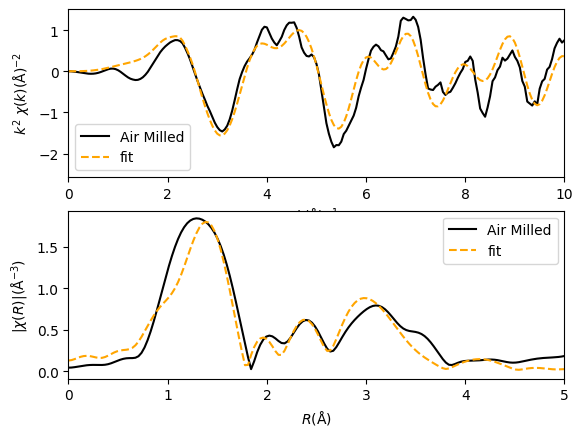

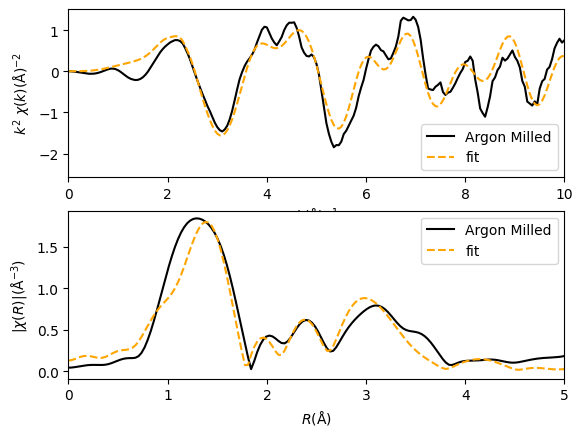

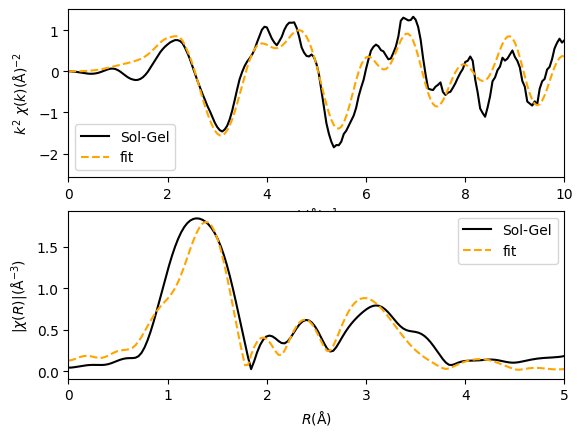

In [13]:
# import custom plot functions (replicate plots in paper)
import paper01_plots as c_plots
for a_fit in fit_list:
    chikr_p = plot_dashed_fit(dset,fit_vars['rmin'],fit_vars['rmax'],fit_vars['kmin'],fit_vars['kmax'], a_fit)
    chikr_p.show()

In [14]:
for a_fit in fit_list:
    print("R-factor %.2f"%(fit_list[a_fit][2].rfactor*100)+"%")

R-factor 24.70%
R-factor 17.47%
R-factor 20.89%


## Reproducibility of results

All of the results can be reproduced. However, we need to confirm if crystal files used are correct, as they are not included in the published dataset.

Pending contactiong authors for validation of process.


Questions:

1. Reference data is not included (LaMnO3, Mn3O4, MnO2) 
2. Should data be rebinned before fitting?
3. Should only use paths listend in paper?
4. Is it OK to smooth data before fitting? or just smooth for plotting?
